# MSDS 422 - Module 8 Assignment 1
## Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%208


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from datetime import datetime
from keras.preprocessing.image import ImageDataGenerator

## CNN 

In [2]:
# Load data
train_dir = ('train')
validation_dir = ('validation')

In [3]:
# Image Generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size = (64, 64) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,  
    batch_size=8,
    class_mode='binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
#Build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [10]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

In [11]:
start=datetime.now()
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)
end=datetime.now()
cnn_time = end-start

Epoch 1/15


C:\Users\COOKFI~1\AppData\Local\Temp/ipykernel_3948/3389481231.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


3000/3000 - 72s - loss: 0.6292 - acc: 0.6425 - val_loss: 0.5975 - val_acc: 0.6690 - 72s/epoch - 24ms/step
Epoch 2/15
3000/3000 - 70s - loss: 0.5850 - acc: 0.6914 - val_loss: 0.5618 - val_acc: 0.7170 - 70s/epoch - 23ms/step
Epoch 3/15
3000/3000 - 71s - loss: 0.5561 - acc: 0.7110 - val_loss: 0.5207 - val_acc: 0.7250 - 71s/epoch - 24ms/step
Epoch 4/15
3000/3000 - 71s - loss: 0.5284 - acc: 0.7373 - val_loss: 0.5208 - val_acc: 0.7420 - 71s/epoch - 24ms/step
Epoch 5/15
3000/3000 - 71s - loss: 0.5093 - acc: 0.7480 - val_loss: 0.4880 - val_acc: 0.7710 - 71s/epoch - 24ms/step
Epoch 6/15
3000/3000 - 71s - loss: 0.4963 - acc: 0.7572 - val_loss: 0.4831 - val_acc: 0.7720 - 71s/epoch - 24ms/step
Epoch 7/15
3000/3000 - 71s - loss: 0.4742 - acc: 0.7744 - val_loss: 0.4452 - val_acc: 0.8040 - 71s/epoch - 24ms/step
Epoch 8/15
3000/3000 - 71s - loss: 0.4615 - acc: 0.7782 - val_loss: 0.4453 - val_acc: 0.7930 - 71s/epoch - 24ms/step
Epoch 9/15
3000/3000 - 71s - loss: 0.4467 - acc: 0.7901 - val_loss: 0.4312 

In [12]:
# Print time
print(cnn_time)

0:17:46.714890


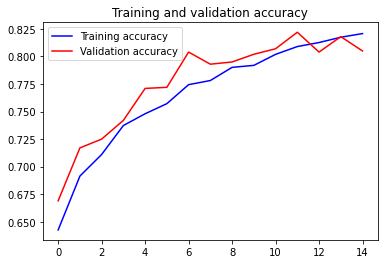

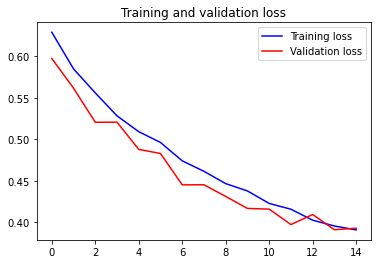

In [13]:
# Visualize training results
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [128]:
# predict to prepare
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_dir = ('test')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)


Found 12500 images belonging to 1 classes.


In [123]:
pred = model.predict(test_generator)

In [17]:
new_pred = pred
new_pred = np.where(new_pred > 0.5, 1, new_pred)
new_pred = np.where(new_pred <= 0.5, 0, new_pred)
final_pred =[0]*len(new_pred)
x = 0
for i in new_pred:
    final_pred[x] = i
    final_pred[x] = str(final_pred[x])[1 : -2]
    x+=1

In [20]:
final_pred = pd.Series(final_pred ,name="label")
submission = pd.concat([pd.Series(range(1,12501),name = "id"),final_pred],axis = 1)
submission.to_csv("predictions.csv",index=False)

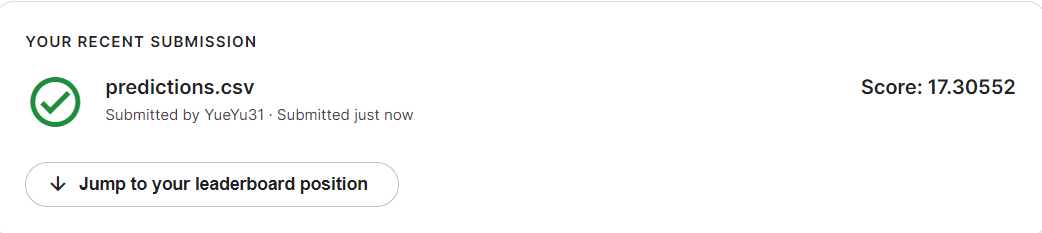

In [56]:
new_pred = pred
final_pred_2 =[0]*len(new_pred)
x = 0
for i in new_pred:
    final_pred_2[x] = i
    final_pred_2[x] = str(final_pred_2[x])[1 : -2]
    x+=1

In [58]:
final_pred_2 = pd.Series(final_pred_2 ,name="label")
submission = pd.concat([pd.Series(range(1,12501),name = "id"),final_pred_2],axis = 1)
submission.to_csv("predictions-2.csv",index=False)

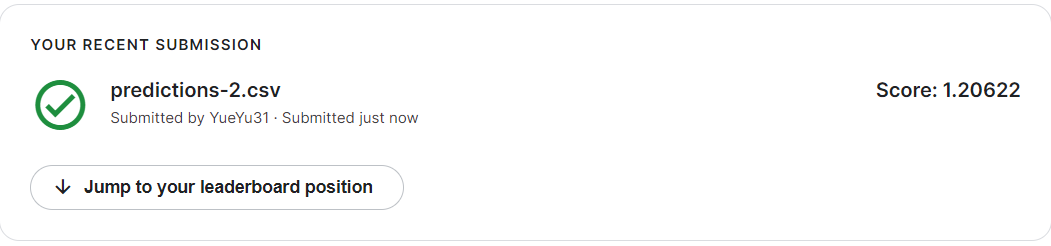

## CNN 2 (4 Conv2D Layers )

In [127]:
# Image Generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size = (64, 64) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,  
    batch_size=8,
    class_mode='binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [65]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [66]:
# Summary
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 128)      

In [67]:
model_2.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

In [68]:
start=datetime.now()
history_2 = model_2.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)
end=datetime.now()
cnn_time_2 = end-start

Epoch 1/15


C:\Users\COOKFI~1\AppData\Local\Temp/ipykernel_3948/3745856717.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(


3000/3000 - 64s - loss: 0.6573 - acc: 0.5971 - val_loss: 0.6101 - val_acc: 0.6600 - 64s/epoch - 21ms/step
Epoch 2/15
3000/3000 - 63s - loss: 0.5839 - acc: 0.6892 - val_loss: 0.5722 - val_acc: 0.7020 - 63s/epoch - 21ms/step
Epoch 3/15
3000/3000 - 63s - loss: 0.5401 - acc: 0.7270 - val_loss: 0.5205 - val_acc: 0.7420 - 63s/epoch - 21ms/step
Epoch 4/15
3000/3000 - 64s - loss: 0.5059 - acc: 0.7536 - val_loss: 0.4800 - val_acc: 0.7670 - 64s/epoch - 21ms/step
Epoch 5/15
3000/3000 - 64s - loss: 0.4832 - acc: 0.7686 - val_loss: 0.5159 - val_acc: 0.7410 - 64s/epoch - 21ms/step
Epoch 6/15
3000/3000 - 63s - loss: 0.4683 - acc: 0.7731 - val_loss: 0.5349 - val_acc: 0.7340 - 63s/epoch - 21ms/step
Epoch 7/15
3000/3000 - 66s - loss: 0.4485 - acc: 0.7856 - val_loss: 0.4778 - val_acc: 0.7660 - 66s/epoch - 22ms/step
Epoch 8/15
3000/3000 - 66s - loss: 0.4264 - acc: 0.7990 - val_loss: 0.4254 - val_acc: 0.7920 - 66s/epoch - 22ms/step
Epoch 9/15
3000/3000 - 66s - loss: 0.4163 - acc: 0.8041 - val_loss: 0.4193 

In [69]:
# Print time
print(cnn_time_2)

0:16:13.772455


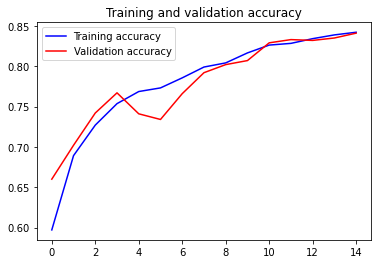

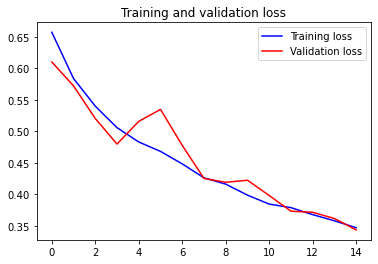

In [71]:
# Visualize training results
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [129]:
pred_2 = model_2.predict(test_generator)

In [73]:
new_pred = pred_2
final_pred_2 =[0]*len(new_pred)
x = 0
for i in new_pred:
    final_pred_2[x] = i
    final_pred_2[x] = str(final_pred_2[x])[1 : -2]
    x+=1

In [75]:
final_pred_2 = pd.Series(final_pred_2 ,name="label")
submission = pd.concat([pd.Series(range(1,12501),name = "id"),final_pred_2],axis = 1)
submission.to_csv("predictions-3.csv",index=False)

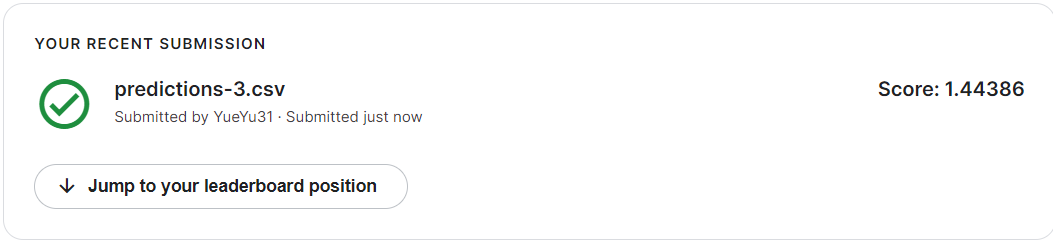

## CNN 3 (Image Size 150x150)

In [125]:
# Image Generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size = (150, 150) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,  
    batch_size=8,
    class_mode='binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [91]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [92]:
# Summary
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 17, 17, 128)    

In [93]:
model_3.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

In [94]:
start=datetime.now()
history_3 = model_3.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)
end=datetime.now()
cnn_time_3 = end-start

Epoch 1/15


C:\Users\COOKFI~1\AppData\Local\Temp/ipykernel_3948/1941860461.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3 = model_3.fit_generator(


3000/3000 - 323s - loss: 0.6205 - acc: 0.6428 - val_loss: 0.5586 - val_acc: 0.7040 - 323s/epoch - 108ms/step
Epoch 2/15
3000/3000 - 313s - loss: 0.5574 - acc: 0.7107 - val_loss: 0.5555 - val_acc: 0.7070 - 313s/epoch - 104ms/step
Epoch 3/15
3000/3000 - 310s - loss: 0.5184 - acc: 0.7406 - val_loss: 0.5035 - val_acc: 0.7440 - 310s/epoch - 103ms/step
Epoch 4/15
3000/3000 - 310s - loss: 0.4949 - acc: 0.7585 - val_loss: 0.5185 - val_acc: 0.7520 - 310s/epoch - 103ms/step
Epoch 5/15
3000/3000 - 309s - loss: 0.4756 - acc: 0.7706 - val_loss: 0.4518 - val_acc: 0.7940 - 309s/epoch - 103ms/step
Epoch 6/15
3000/3000 - 303s - loss: 0.4570 - acc: 0.7831 - val_loss: 0.4428 - val_acc: 0.7870 - 303s/epoch - 101ms/step
Epoch 7/15
3000/3000 - 301s - loss: 0.4369 - acc: 0.7931 - val_loss: 0.4425 - val_acc: 0.7960 - 301s/epoch - 100ms/step
Epoch 8/15
3000/3000 - 299s - loss: 0.4271 - acc: 0.8039 - val_loss: 0.4064 - val_acc: 0.8170 - 299s/epoch - 100ms/step
Epoch 9/15
3000/3000 - 301s - loss: 0.4098 - acc: 0

In [95]:
# Print time
print(cnn_time_3)

1:16:03.544463


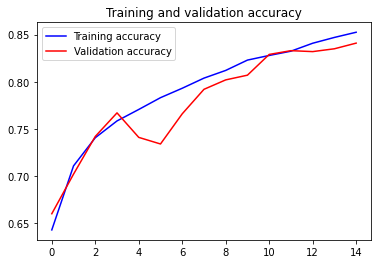

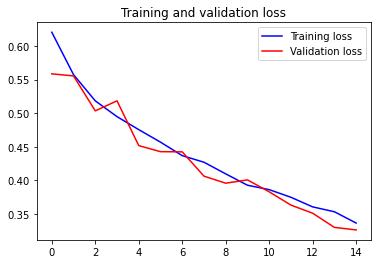

In [96]:
# Visualize training results
acc = history_3.history['acc']
val_acc = history_2.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

pred_3 = model_3.predict(test_generator)

Found 12500 images belonging to 1 classes.


In [99]:
new_pred = pred_3
final_pred_2 =[0]*len(new_pred)
x = 0
for i in new_pred:
    final_pred_2[x] = i
    final_pred_2[x] = str(final_pred_2[x])[1 : -2]
    x+=1

In [100]:
final_pred_2 = pd.Series(final_pred_2 ,name="label")
submission = pd.concat([pd.Series(range(1,12501),name = "id"),final_pred_2],axis = 1)
submission.to_csv("predictions-4.csv",index=False)

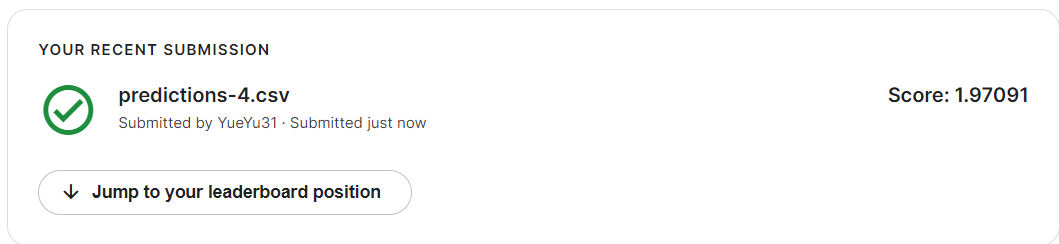

## CNN 4 (50 Epochs)

In [101]:
# Image Generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
img_size = (64, 64) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,  
    batch_size=8,
    class_mode='binary' 
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [105]:
#Build model

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [106]:
# Summary
model_4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 6, 6, 128)      

In [107]:
model_4.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['acc'])

In [110]:
start=datetime.now()
history_4 = model_4.fit_generator(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=2
)
end=datetime.now()
cnn_time_4 = end-start

Epoch 1/50


C:\Users\COOKFI~1\AppData\Local\Temp/ipykernel_3948/131854613.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_4 = model_4.fit_generator(


3000/3000 - 72s - loss: 0.6050 - acc: 0.6697 - val_loss: 0.5780 - val_acc: 0.6810 - 72s/epoch - 24ms/step
Epoch 2/50
3000/3000 - 71s - loss: 0.5660 - acc: 0.7040 - val_loss: 0.5389 - val_acc: 0.7310 - 71s/epoch - 24ms/step
Epoch 3/50
3000/3000 - 71s - loss: 0.5416 - acc: 0.7250 - val_loss: 0.5408 - val_acc: 0.7140 - 71s/epoch - 24ms/step
Epoch 4/50
3000/3000 - 73s - loss: 0.5295 - acc: 0.7321 - val_loss: 0.5098 - val_acc: 0.7490 - 73s/epoch - 24ms/step
Epoch 5/50
3000/3000 - 73s - loss: 0.5071 - acc: 0.7493 - val_loss: 0.4843 - val_acc: 0.7740 - 73s/epoch - 24ms/step
Epoch 6/50
3000/3000 - 73s - loss: 0.4920 - acc: 0.7597 - val_loss: 0.4796 - val_acc: 0.7830 - 73s/epoch - 24ms/step
Epoch 7/50
3000/3000 - 73s - loss: 0.4759 - acc: 0.7704 - val_loss: 0.4628 - val_acc: 0.7740 - 73s/epoch - 24ms/step
Epoch 8/50
3000/3000 - 72s - loss: 0.4658 - acc: 0.7758 - val_loss: 0.4382 - val_acc: 0.7880 - 72s/epoch - 24ms/step
Epoch 9/50
3000/3000 - 73s - loss: 0.4491 - acc: 0.7854 - val_loss: 0.4289 

In [111]:
# Print time
print(cnn_time_4)

1:00:26.939082


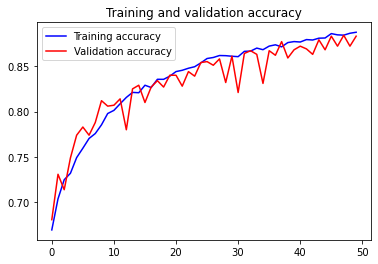

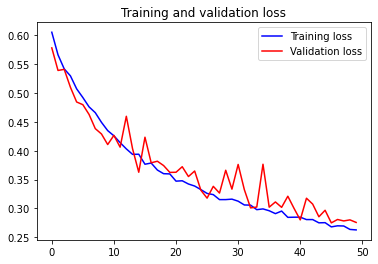

In [112]:
# Visualize training results
acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [113]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary'
)

Found 12500 images belonging to 1 classes.


In [114]:
pred_4 = model_4.predict(test_generator)
pred_4

array([[0.07044142],
       [0.9873302 ],
       [0.13374954],
       ...,
       [0.9943048 ],
       [0.41014886],
       [0.657086  ]], dtype=float32)

In [115]:
new_pred = pred_4
final_pred_2 =[0]*len(new_pred)
x = 0
for i in new_pred:
    final_pred_2[x] = i
    final_pred_2[x] = str(final_pred_2[x])[1 : -2]
    x+=1

In [116]:
final_pred_2 = pd.Series(final_pred_2 ,name="label")
submission = pd.concat([pd.Series(range(1,12501),name = "id"),final_pred_2],axis = 1)
submission.to_csv("predictions-5.csv",index=False)

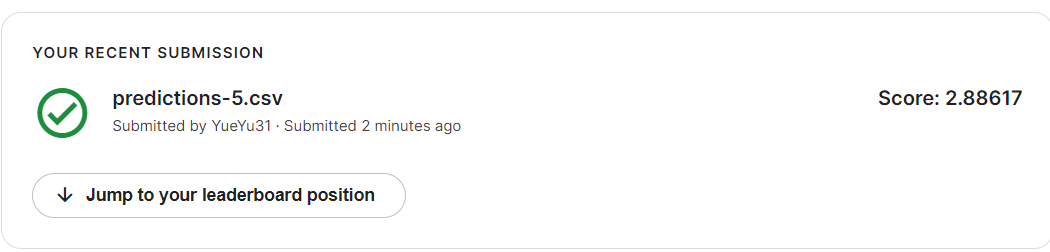

## Conclusion

In [121]:
data = [['64x64',3,15,cnn_time,0.8208,0.8050], 
        ['64x64',4,15,cnn_time_2,0.8421,0.8410], 
        ['150x150',3,15,cnn_time_3,0.8525,0.8510], 
        ['64x64',3,50,cnn_time_4,0.8873,0.8830]]

In [122]:
con_df = pd.DataFrame(data, columns = ['Image Size','Conv2D Layers', 'Epochs','Time','Training Accuracy','Testing Accuracy'])
con_df

,Image Size,Conv2D Layers,Epochs,Time,Training Accuracy,Testing Accuracy
0,64x64,3,15,0 days 00:17:46.714890,0.8208,0.805
1,64x64,4,15,0 days 00:16:13.772455,0.8421,0.841
2,150x150,3,15,0 days 01:16:03.544463,0.8525,0.851
3,64x64,3,50,0 days 01:00:26.939082,0.8873,0.883


By controlling the four variables of CNN, I got some enlightenment. Adding Conv2D Layers can increase prediction accuracy without increasing the modeling time; the effect is more pronounced. 

Changing image size also has a significant influence on the accuracy of prediction. Once the hardware allows, the more detailed the photos are, the better the model training effect is. But at the same time, modeling time increases massively.

Increasing Epochs is a more effective method. It can be seen from the various Training and Validation accuracy charts that the number and accuracy of Epochs is a standard function curve. However, the disadvantages are also apparent. Increasing the number of EPOCHS will significantly increase the modeling time and require very high hardware requirements.

In addition, I am not quite clear about the scoring criteria after the Kaggle upload. In the first prediction of CNN, I completely converted it to 0,1, but since it was not obvious to observe, I still retained the method before transformation to compare CNN and CNN 4.